In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import datetime
from dateutil.relativedelta import relativedelta, MO

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url)
btc_content = btc_data.json()
btc_price = btc_content['data']['1']['quotes']['USD']['price']

In [6]:
# Fetch current ETH price
eth_data = requests.get(eth_url)
eth_content = eth_data.json()
eth_price = eth_content['data']['1027']['quotes']['USD']['price']

In [7]:
# Compute current value of my crpto
my_btc_value = (my_btc*btc_price)

my_eth_value = (my_eth*eth_price)

crypto_val = (my_btc*btc_price)+(my_eth*eth_price)
crypto_val_format = "${:,.2f}".format(crypto_val)

print(f"The current total value of cryptocurrency in this portfolio is {crypto_val_format}")

The current total value of cryptocurrency in this portfolio is $96,863.05


In [8]:
# Print current crypto wallet balance
btc_val_format = "${:,.2f}".format(my_btc_value)
eth_val_format = "${:,.2f}".format(my_eth_value)
print(f"The current value of your {my_btc} BTC is {btc_val_format}")
print(f"The current value of your {my_eth} ETH is {eth_val_format}")

The current value of your 1.2 BTC is $73,234.80
The current value of your 5.3 ETH is $23,628.25


In [9]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [11]:
# Format current date as ISO format
hoy = pd.to_datetime("now")
five_ago = pd.to_datetime("now")-relativedelta(years=5)
today = pd.Timestamp(hoy, tz="America/New_York").isoformat

In [12]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit=1000
).df
# Preview DataFrame
df_portfolio

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2017-11-15 00:00:00-05:00  109.26  109.3800  109.1400  109.33  1959296.0   
2017-11-16 00:00:00-05:00  109.22  109.3200  109.1750  109.18  1754309.0   
2017-11-17 00:00:00-05:00  109.33  109.3900  109.2600  109.32  1779593.0   
2017-11-20 00:00:00-05:00  109.23  109.3000  109.1800  109.25  2383640.0   
2017-11-21 00:00:00-05:00  109.39  109.4300  109.2220  109.34  1939152.0   
...                           ...       ...       ...     ...        ...   
2021-11-01 00:00:00-04:00  114.16  114.4200  114.1400  114.38  5757362.0   
2021-11-02 00:00:00-04:00  114.43  114.6900  114.4300  114.60  4487286.0   
2021-11-03 00:00:00-04:00  114.65  114.6900  114.2501  114.38  5400431.0   
2021-11-04 00:00:00-04:00  114.51  114.8400  114.4800  114.77  6026954.0   
2021-11-05 00:00:00-04:00  114.99  115.3199  114.9001  115.24  6641501.0   

                              SPY                                           
                             open      high       low    close      volume  
time                                                                        
2017-11-15 00:00:00-05:00     NaN       NaN       NaN      NaN         NaN  
2017-11-16 00:00:00-05:00  257.52  259.0400  257.4748  258.609  51840766.0  
2017-11-17 00:00:00-05:00  258.22  258.4400  257.7700  257.890  42081169.0  
2017-11-20 00:00:00-05:00  258.14  258.5250  257.8600  258.290  29587185.0  
2017-11-21 00:00:00-05:00  259.18  260.2000  259.0900  259.960  43517856.0  
...                           ...       ...       ...      ...         ...  
2021-11-01 00:00:00-04:00  460.30  460.7021  458.2000  460.080  41362369.0  
2021-11-02 00:00:00-04:00  460.21  462.2300  460.0800  461.870  41914839.0  
2021-11-03 00:00:00-04:00  461.30  465.1500  460.8300  464.730  44736952.0  
2021-11-04 00:00:00-04:00  465.36  467.0000  464.9900  466.860  45729874.0  
2021-11-05 00:00:00-04:00  469.28  470.6500  466.9200  468.490  56119290.0  

[1001 rows x 10 columns]

In [13]:
# Pick AGG and SPY close prices
agg_close_price =float(df_portfolio["AGG"]["close"]['2021-10-22 00:00:00-04:00'])
spy_close_price =float(df_portfolio["SPY"]["close"]['2021-10-22 00:00:00-04:00'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")


Current AGG closing price: $114.07
Current SPY closing price: $453.13


In [14]:
# Compute the current value of shares
my_spy_value = my_spy*spy_close_price
spy_val_format = "${:,.2f}".format(my_spy_value)

my_agg_value = my_agg*agg_close_price
agg_val_format = "${:,.2f}".format(my_agg_value)

total_stock_value = my_spy_value + my_agg_value
tot_val_format = "${:,.2f}".format(total_stock_value)

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is {spy_val_format}")
print(f"The current value of your {my_agg} AGG shares is {agg_val_format}")
print(f"The total value of your stock market investment is {tot_val_format}")

The current value of your 50 SPY shares is $22,656.50
The current value of your 200 AGG shares is $22,814.00
The total value of your stock market investment is $45,470.50


In [15]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
investment_data = {'Amount':{'Crypto':crypto_val, 'Shares':total_stock_value}}

# Create savings DataFrame
df_value=pd.DataFrame(investment_data)

# Display savings DataFrame
df_value

,Amount
Crypto,96863.048
Shares,45470.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='Amount'>

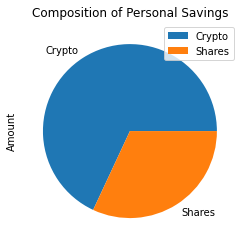

In [16]:
# Plot savings pie chart
df_value.plot.pie( y='Amount', title = 'Composition of Personal Savings')

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund_format = "${:,.2f}".format(emergency_fund)
emergency_fund_format

'$36,000.00'

In [18]:
# Calculate total amount of savings
total_savings = total_stock_value+crypto_val
total_savings_format = "${:,.2f}".format(total_savings)
total_savings_format

'$142,333.55'

In [19]:
# Validate saving health
if total_savings > emergency_fund:
    print(f"Congrats! You've saved {total_savings_format} which is {round(total_savings/emergency_fund,3)} times your recommended Emergency Savings Amount of {emergency_fund_format}!")
elif total_savings < emergency_fund:
    print(f"Ruh roh! You need to save {emergency_fund-total_savings} in order to be safe! Run for your life!")
else:
    print(f"You're right on the money with your savings, but what if there's a bigger emergency?!")


Congrats! You've saved $142,333.55 which is 3.954 times your recommended Emergency Savings Amount of $36,000.00!


In [20]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp(five_ago, tz='America/New_York').isoformat()
end_date = pd.Timestamp(hoy, tz='America/New_York').isoformat()

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)


tickers = ["SPY", "AGG"]
timeframe = '1D'

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high      low   close     volume    open   
time                                                                            
2017-11-15 00:00:00-05:00  109.26  109.38  109.140  109.33  1959296.0     NaN   
2017-11-16 00:00:00-05:00  109.22  109.32  109.175  109.18  1754309.0  257.52   
2017-11-17 00:00:00-05:00  109.33  109.39  109.260  109.32  1779593.0  258.22   
2017-11-20 00:00:00-05:00  109.23  109.30  109.180  109.25  2383640.0  258.14   
2017-11-21 00:00:00-05:00  109.39  109.43  109.222  109.34  1939152.0  259.18   

                                                                   
                              high       low    close      volume  
time                                                               
2017-11-15 00:00:00-05:00      NaN       NaN      NaN         NaN  
2017-11-16 00:00:00-05:00  259.040  257.4748  258.609  51840766.0  
2017-11-17 00:00:00-05:00  258.440  257.7700  257.890  42081169.0  
2017-11-20 00:00:00-05:00  258.525  257.8600  258.290  29587185.0  
2017-11-21 00:00:00-05:00  260.200  259.0900  259.960  43517856.0

In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_spy_agg = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6, .4],
    num_simulation = 1000,
    num_trading_days = 252*30)

In [23]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_spy_agg.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jamesmiller/Desktop/class-activities/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004062,0.995657,1.010896,0.991400,1.003035,1.003985,0.999175,0.998840,1.000276,1.010642,...,1.009168,1.003933,1.005755,0.993795,1.000806,1.003000,0.993319,0.996245,1.000458,0.991789
2,1.009153,0.998364,1.011612,0.989407,1.004301,1.007433,0.990742,1.007644,1.008262,1.015811,...,1.015309,1.005549,1.001014,1.002961,1.000205,1.004870,1.002440,0.993397,1.010492,0.998318
3,1.010231,1.004558,1.005783,0.993611,1.011523,1.010435,0.993653,1.014535,1.011045,1.016947,...,1.016932,1.004571,1.004360,1.003446,0.999283,1.003277,0.998882,0.993440,1.001541,1.008420
4,1.009382,1.004255,1.017388,0.992897,1.009479,1.003873,1.006841,1.026333,1.011661,1.022885,...,1.032681,1.004845,1.011875,1.007355,1.004033,1.004420,1.004495,0.997522,1.010496,1.001870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.468950,10.382478,5.957932,9.634944,8.969889,5.597874,14.481369,14.678039,15.409099,7.295599,...,5.461388,14.352438,16.808498,8.023670,8.565132,7.696772,7.667222,8.979768,9.629242,6.947360
7557,6.434504,10.466254,5.950017,9.671342,8.933632,5.584699,14.433895,14.764593,15.219265,7.338945,...,5.465664,14.293400,16.789451,7.957426,8.567769,7.684077,7.616950,8.858518,9.641417,6.924072
7558,6.425507,10.484925,5.986678,9.702869,8.945793,5.558635,14.394233,14.748983,15.286425,7.327166,...,5.469118,14.172946,16.589303,7.919233,8.707761,7.685240,7.639653,8.892919,9.495799,6.935534
7559,6.461847,10.572234,5.981439,9.693830,9.007699,5.516204,14.368595,14.709878,15.227847,7.379058,...,5.501961,14.166187,16.755470,7.949450,8.752592,7.692325,7.694904,8.910516,9.521656,6.980202


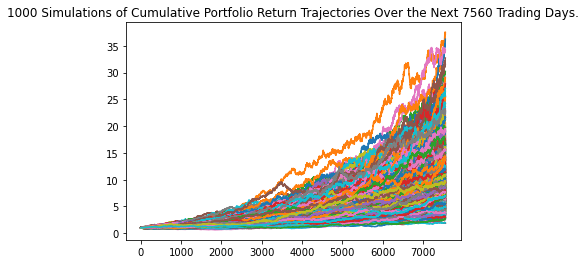

In [24]:
# Plot simulation outcomes
line_plot = MC_spy_agg.plot_simulation()

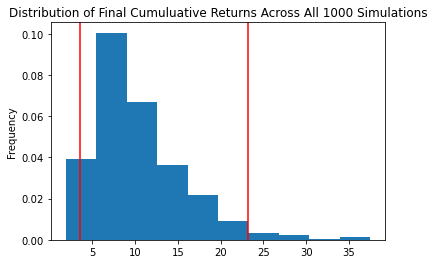

In [25]:
# Plot probability distribution and confidence intervals
dist_plot = MC_spy_agg.plot_distribution()

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_spy_agg.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean              10.333179
std                5.284305
min                1.896414
25%                6.495631
50%                9.037026
75%               12.830745
max               37.479510
95% CI Lower       3.539564
95% CI Upper      23.241611
Name: 7560, dtype: float64


In [27]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $70791.28 and $464832.21


In [28]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $106186.92 and $697248.32
